# Algorithm: Linear Regression
## Language: Python
## Author: Daisy Nsibu

# Introduction

### What is Linear Regression?

Linear regression is a supervised learning algorithm that is applied to real valued target functions in order to predict a range of possible outputs for a given input.

Note: I'd like to point out that this is a predictive or regression algorithm so this is not classification problem. This is giving us a range of possibilites for a given input.

### What are the Assumptions?

Assume the targets are close to some linear combination of the features of measurements of the input data. So we need to assume that the labels of our input data lie in some linear combination or close to some linear combination of the input.

Unlike other machine learning algorithms linear regression has a closed form solution. In other words, there is an equation that solves linear regression. Now there's also a way to solve this using optimization techniques such as stochastic descent or [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent#:~:text=Gradient%20descent%20is%20a%20first,the%20direction%20of%20steepest%20descent.).

Linear Regression is one of the simplest algorithms in machine learning and it can be trained in different ways. However in this notebook I'll be using the closed form of linear regression.

In general linear regression is used to show relationships with dependencies between feature measures and their label.

### Some possible applications of linear regression Examples:

Use Linear Regression to relate the force for extending a spring to the distance the spring stretches to. We can use Linear Regression and model the relationship here and derive [Hooke's law.](https://en.wikipedia.org/wiki/Hooke%27s_law)
Use Linear Regression to relate the salary of a developer to their age and experience.


### How does it work?
Suppose we have 3 data points on a graph where x is our feature and y is. our label.

Suppose we have 3 data points on a graph where x is our feature and y is. our label.

$(x^{1}, y^{1})
(x^{2}, y^{2})
(x^{3}, y^{3})$

For example x can be age can be a feature  and our label y could be salary(USD). Now suppose we want to know the possible salary for $x^{*}$ and we dont know the label but we want a possible salary for someone who is that age.

What we do with linear regression is seek a line that bests fits this data. what we want is a line that somehow approximates those points. So How can we find this line?

### We want
What we want is to solve a system of equations. So for example, we want $y^{1} = w_ix^{1} + w_2$. We also want to hit the other point with the line, $y^{2} = w_ix^{2} + w_2$, and we also want to hit $y^{3} = w_ix^{3} + w_2$ with the line. But there is no line that will fit all those pooints. So in regression the best we can possibly do is approx those points.
$$y^{1} \approxeq w_ix^{1} + w_2$$
$$y^{2} \approxeq w_ix^{2} + w_2$$
$$y^{3} \approxeq w_ix^{3} + w_2$$


But let's ignore the approximation part of this for now.
What does this system look like? Well it looks like this:

$$\begin{bmatrix}
            x^{1}  1\\
            x^{2}  1\\
            x^{3}  1
           \end{bmatrix}\begin{bmatrix}
            w_{1} \\
            w_{2}
           \end{bmatrix} = \begin{bmatrix}
            y^{1} \\
            y^{2} \\
            y^{3}
           \end{bmatrix}$$

To solve this problem, we need to solve this system of equations. So we can denote this matrix as $$\begin{bmatrix}
            x^{1}  1\\
            x^{2}  1\\
            x^{3}  1
           \end{bmatrix} \Rightarrow  X$$ and we can denote this vector as 
$$\begin{bmatrix}
            w_{1} \\
            w_{2}
           \end{bmatrix}\Rightarrow  w$$ and then this vector by $$\begin{bmatrix}
            y^{1} \\
            y^{2} \\
            y^{3}
           \end{bmatrix}\Rightarrow  y$$
 so what we're wishing to solve is $Xw = y$
 
 $X$ is likely non-invertible so the best we can do is solve for an approximation.Say $\hat{w}$ with $X\hat{w}\approx y$. That's the best we can do. So how do we find this?
 
 Well starting from this this equation, we want $Xw = y$ and we know that $X$ is more than likely not invertible. But we can play with this, and multiply both sides by $X^{T}$
  $$X^{T}X\hat{w}=X^{T}y$$ so lets call this solution to this system $\hat{w}$
  
Now $X^{T}X$ is going to be invertible. So what we have now is that, $$X^{T}X\hat{w} = X^{T}y \Rightarrow \hat{w} = (X^{T}X)^{-1}X^{T}y$$ this here is the **closed-form solution** to linear regression. 

*Note: $(X^{T}X)^{-1}$ is called the pseudo inverse of X*

So now thaat we solve this system of equations, we're going to say that if we want to know what the approximate label for this $x^{*}$ is , then we'll say that $y \approx \hat{w_1}x^{*} + \hat{w_2}$ once we solve for $\hat{w}$ . This is called a prediction. This prediction for a given input will give us an approximate output provided the data  closely lies to some linear approximation.
  



##  Loading the data

This is a simple example using regression.

This example shows how useful regression can be . In the following example,  the data are delivery time observations for cases of food from unique distances 

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load the data

In [6]:
# read data

df= pd.read_csv("dt.csv")
df.head()

,Observation,Delivery_Time,Number_Cases,Distance_ft
0,1,16.68,7,560
1,2,11.50,3,220
2,3,12.03,3,340
3,4,14.88,4,80
4,5,13.75,6,150


In [32]:
Y= df["Delivery_Time"]
X= df["Distance_ft"]


In [33]:
# predict Function
def predict(m,b,X):
    return m*X+b


In [34]:
# error function
def error(m,b,x,y):
    return predict(m,b,x) - y


In [35]:
def sum_square_error(m,b,X,Y):
    errored=0
    no_of_element = len(X)
    for i in range(no_of_element):
        errored+=error(m,b,x[i],y[i])
    return errored**2


In [36]:
#The Fit Method
import numpy as np
def least_square_mean_fit(X,Y):
    x_mean = np.mean(X)
    y_mean = np.mean(Y)
  ## Total number of values
    total_no_values=len(X)
    corr=0
    std=0
    for i in range(total_no_values):
        corr+=((X[i]-x_mean) * (Y[i]-y_mean))
        std+=(X[i] - x_mean)**2
    m=corr/std
    b=y_mean - (m*x_mean)
    return m,b

In [39]:
m,b = least_square_mean_fit(X,Y)

In [40]:
print(m,",",b)

0.04256949066749951 , 4.961158859605803


In [46]:
predict(m,b,700)

34.75980232685546

In [47]:
error(m,b,X,Y)

0     12.120074
1      2.826447
2      7.404786
3     -6.513282
4     -2.403418
5      0.899091
6      1.643803
7     -3.929248
8    -12.127385
9      9.215701
10    -6.081032
11    -6.886401
12     2.316379
13     4.878264
14     0.032291
15     8.995084
16    -1.874943
17    -8.419668
18    -3.006339
19     2.639667
20    -6.979112
21   -12.877554
22     5.367430
23    12.162785
24     0.596582
dtype: float64

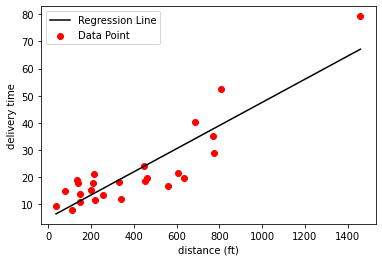

In [45]:
x_max = np.max(X) 
x_min = np.min(X) 

x = np.linspace(x_min, x_max, 1000)
y = b + m * x
#plotting line 
plt.plot(x, y, color='black', label='Regression Line')
#plot the data point
plt.scatter(X, Y, color='red', label='Data Point')
# x-axis label
plt.xlabel('distance (ft)')
#y-axis label
plt.ylabel('delivery time')
plt.legend()
plt.show()

In [48]:
Y= df["Delivery_Time"]
X= df["Number_Cases"]

In [49]:
m,b = least_square_mean_fit(X,Y)

In [50]:
print(m,",",b)

2.1761666783979723 , 3.3207798972337628


In [51]:
predict(m,b,20)

46.84411346519321

In [52]:
error(m,b,X,Y)

0      1.873947
1     -1.650720
2     -2.180720
3     -2.854553
4      2.627780
5      0.443947
6     -0.326887
7      0.723947
8    -10.634220
9     -7.298387
10    -2.190553
11     4.082447
12    -1.474553
13    -3.372220
14    -1.093720
15    -3.917553
16     1.027780
17    -0.446053
18     0.349280
19     5.215613
20     7.182447
21     7.581114
22     4.156280
23     0.900113
24     1.275447
dtype: float64

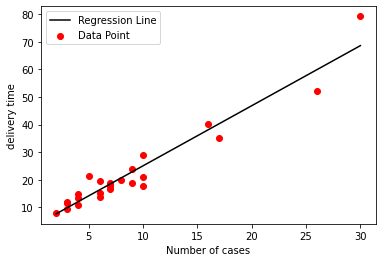

In [54]:
x_max = np.max(X) 
x_min = np.min(X) 

x = np.linspace(x_min, x_max, 1000)
y = b + m * x
#plotting line 
plt.plot(x, y, color='black', label='Regression Line')
#plot the data point
plt.scatter(X, Y, color='red', label='Data Point')
# x-axis label
plt.xlabel('Number of cases')
#y-axis label
plt.ylabel('delivery time')
plt.legend()
plt.show()

# Conclusion

So this is a really good example of how useful regression can be. For a distance of 700 ft the algorithm predicted that it would take about  34.8 minutes to deliver cases. When the number of cases is x, the algorithm predicts that at 20 cases, it would take about 46 minutes to get delivered. When the number of cases is the regressor, the error is a lot smaller and thus For further studies I would conduct this  data set on the gradient descent algorithm. 


# References

Introduction to linear regression analysis / Douglas C. Montgomery, Elizabeth A. Peck, G. Geoffrey Vining. – 5th ed.
